In [31]:
%matplotlib notebook

from random import *
import numpy as np
import time
import numba
from matplotlib import animation, colors, pyplot as plt

### Task 1 - Initialization of the forest grid (n x n grid)

#### Initilize the Constants

* EMPTY -  No tree in the site/grid 
* TREE -   No Burning tree in the site 
* BURNING - Tree is burning

* probTree - The probability that a site initially has a tree
* probBurning - The probability that a tree is burning
* probImmune - The probability of tree immunity to catch fire
* probLightning - The probability of lightning strike a tree

In [36]:
global EMPTY, TREE, BURNING, probTree, probBurning, probImmune, probLightning

EMPTY = 0   # empty cell
TREE = 1    # non-burning trees
BURNING = 2 # burning trees


probTree = 0.8
probBurning = 0.01
probImmune = 0.3
probLightning = 0.001

In [3]:
"""
The initForestGrid 

The initForestGrid Function takes the following value -  n, probTree, probTree:
n: is the size (number of rows or columns) of the square grid and is positive
probTree: the probability that a site has a tree
proBurning: the probability that a tree is burning


Then, Function returns an n-by-n 2 two dimensional grid of values 
EMPTY(No Tree)
TREE (non-burning tree) 0r
BURNING (burning tree)
"""

def initForestGrid(n, probTree, probBurning):
    grid = np.zeros((n, n))
    for ix in range(0, n):     # ChecK the Row
        for iy in range(0, n): # check each column 
            if (random() < probTree):        # probability that a site initially occupied by tree
                if (random() < probBurning): # probability that a tree is burning initially
                    grid[ix, iy] = BURNING   # assign BURNING to the cell
                else:
                    grid[ix, iy] = TREE      # assign TREE to the cell
            else:
                grid[ix, iy] = EMPTY         # assign EMPTY to the cell
    return grid

### Task 2 - Extending the boundaries of the forest grid.

In [37]:
"""
The periodicLat function will accept a grid and return a grid extended one cell in each 
direction with periodic boundary conditions.



 lat: is a grid
 latrow: The Grid is extended by having a new first row that is a copy of the last row on the 
 original grid and having a new last row that is a copy of the first row on the original grid
 latExtd: The grid extended by having a new first column that is a copy of the last column and a new last 
 column that is a copy of the first column
 
 return: extended grid in each direction with periodic boundary condition.
"""

def periodicLat(lat):
    latrow = np.row_stack((lat[0], lat, lat[-1])) #concatenation of last row of lat, lat, and first row of lat
    latExtd = np.column_stack((latrow[:,0], latrow, latrow[:,-1])) #concatenation of last column of latNS, latNS, and first column of
    return latExtd

### Task 3 - Method to return the value of a site at the next time step (spread)

In [5]:
"""
The spread function determines spread of fire at every simulation iteration, whether a cell is empty, 
has a tree or is burning in the next time step.

The value in a cell depends on the neighboring cell values using the Moore 
neighborhood

  site: the current location
  siteNTS: Site next time step
  N: north neighbour
  NE: north east neighbour
  E: east neighbour
  SE: south east neighbour
  S: south neighbour
  SW: south west neighbour
  W: west neighbour
  NW: north west neighbour
  return: the new site next time step value
"""

def spread(site, N, NE, E, SE, S, SW, W, NW, probLightning, probImmune):
    if (site == EMPTY):
        siteNTS = EMPTY
    else:
        if (site == BURNING):
            siteNTS = EMPTY
        else:
            if (N == BURNING or NE == BURNING or E == BURNING or SE == BURNING 
                or S == BURNING or SW == BURNING or W == BURNING or NW == BURNING):
                if (random() < probImmune): # probabilty that tree has immunity
                    siteNTS = TREE
                else:
                    siteNTS = BURNING
            else:
                if (random() < probLightning  * (1 - probImmune)): # probability that lightning strikes the tree and it dies not have immunity
                    siteNTS = BURNING
                else:
                    siteNTS = TREE
    return siteNTS

### Task 4 – Applying the spread function to the extended grid

In [6]:
"""
For this simulation, apply the function spread (a function that determines spread of 
fire in the next iteration) to every grid point, using periodic boundary (ghost cells 
applied to the initial grid) conditions. To apply a spread, extend the boundaries by 
one cell. After, apply the function spread to each internal cell and then remove the 
boundary cells.
"""

def applyExtended(latExt, probLightning, probImmune):
    n = latExt.shape[0] - 2
    newLat = np.zeros((n, n))    
    
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            site = latExt[i, j]
            N = latExt[i - 1, j]
            NE = latExt[i - 1, j + 1]
            E = latExt[i, j + 1]
            SE = latExt[i + 1, j + 1]
            S = latExt[i + 1, j]
            SW = latExt[i + 1, j - 1]
            W = latExt[i, j - 1]
            NW = latExt[i - 1, j - 1]
            
            newLat[i - 1, j - 1] = spread(site, N, NE, E, SE, S, SW, W, NW, probLightning, probImmune)
    return newLat

### Task 5 – Setting up the simulation

In [14]:
"""

"""

def fire(n, probTree, probBurning, probLightning, probImmune, t):
    forest  = initForestGrid(n, probTree, probBurning)
    
    # Perform simulation
    grids = np.zeros((t + 1, n, n))
    grids[0, :, :] = forest
    for i in range(1, t + 1):
        forestExtended = periodicLat(forest)
        forest = applyExtended(forestExtended, probLightning, probImmune)
        grids[i, :, :] = forest
    return grids

## Parallel  Implentation

## Visualization


In [ ]:
Visualizing the grid 

In [12]:
def makeColorGrid(grid):
    n = grid.shape[0]
    colorGrid = np.zeros((n, n, 3))
    colorGrid[:, :, 0] = 1
    colorGrid[:, :, 1] = 1
    for i in range(0, n):
        for j in range(0, n):
            if (grid[i, j] == TREE):
                colorGrid[i, j, 0] = 0.1
                colorGrid[i, j, 1] = 0.75
                colorGrid[i, j, 2] = 0.02
            if (grid[i, j] == BURNING):
                colorGrid[i, j, 0] = 0.6
                colorGrid[i, j, 1] = 0.2
                colorGrid[i, j, 2] = 0.1                
    return colorGrid

In [22]:
seed(1)
grids = fire(100, 0.8, 0.001, 0.001, 0.3, 20)

<IPython.core.display.Javascript object>


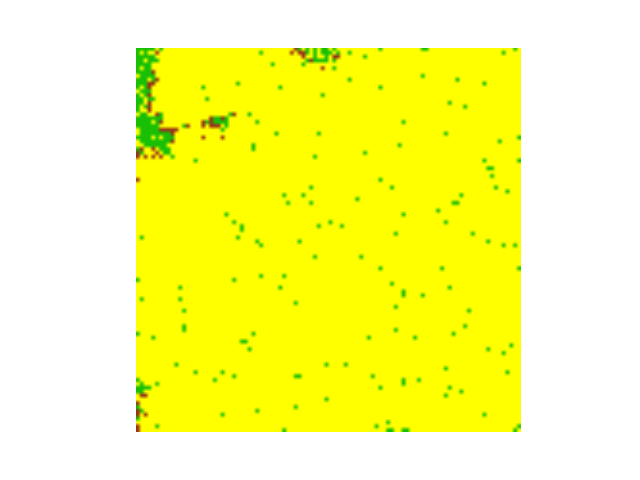

In [23]:
fig = plt.figure()
plt.axis('off')
im = plt.imshow(makeColorGrid(grids[0,:,:]), animated=True)

# The animation function: called to produce a frame for each generation.
def updatefig(i, *args):
    global grids
    im.set_array(makeColorGrid(grids[i,:,:]))
    return im,

grid_ani = animation.FuncAnimation(fig, updatefig, save_count = len(grids), 
                                   interval=100, blit=True)
plt.show()

In [24]:
grids = fire(400, 0.8, 0.001, 0.001, 0.3, 20)

<IPython.core.display.Javascript object>


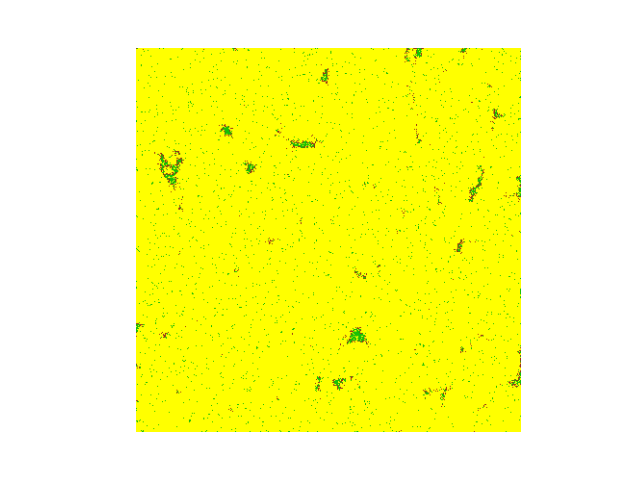

In [25]:
fig = plt.figure()
plt.axis('off')
im = plt.imshow(makeColorGrid(grids[0,:,:]), animated=True)

# The animation function: called to produce a frame for each generation.
def updatefig(i, *args):
    global grids
    im.set_array(makeColorGrid(grids[i,:,:]))
    return im,

grid_ani = animation.FuncAnimation(fig, updatefig, save_count = len(grids), 
                                   interval=100, blit=True)
plt.show()

In [26]:
grids = fire(800, 0.8, 0.001, 0.001, 0.3, 20)

<IPython.core.display.Javascript object>


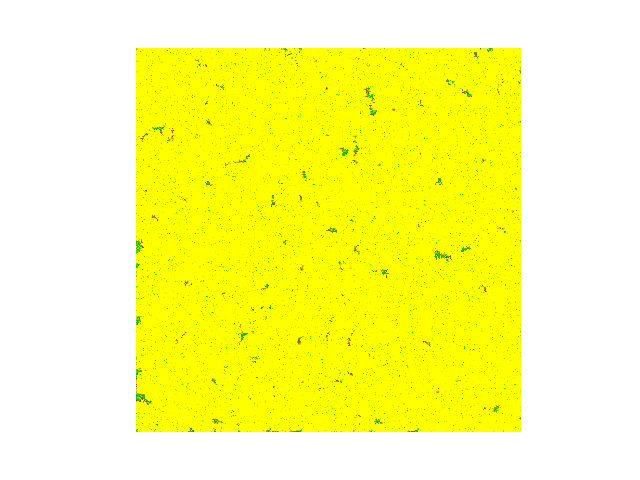

In [27]:
fig = plt.figure()
plt.axis('off')
im = plt.imshow(makeColorGrid(grids[0,:,:]), animated=True)

# The animation function: called to produce a frame for each generation.
def updatefig(i, *args):
    global grids
    im.set_array(makeColorGrid(grids[i,:,:]))
    return im,

grid_ani = animation.FuncAnimation(fig, updatefig, save_count = len(grids), 
                                   interval=100, blit=True)
plt.show()

In [28]:
grids = fire(1000, 0.8, 0.001, 0.001, 0.3, 20)

<IPython.core.display.Javascript object>


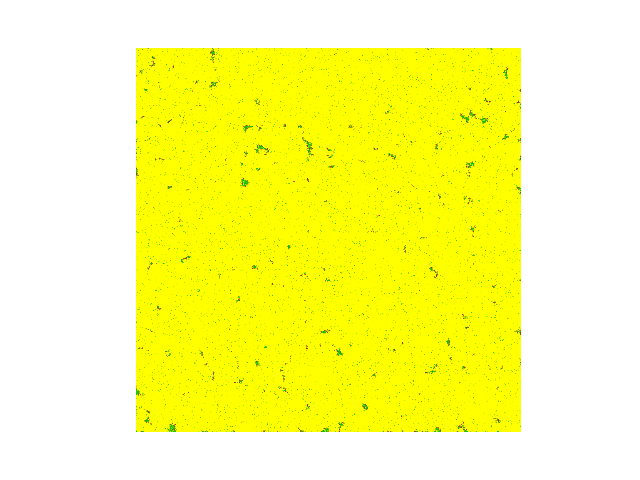

In [29]:
fig = plt.figure()
plt.axis('off')
im = plt.imshow(makeColorGrid(grids[0,:,:]), animated=True)

# The animation function: called to produce a frame for each generation.
def updatefig(i, *args):
    global grids
    im.set_array(makeColorGrid(grids[i,:,:]))
    return im,

grid_ani = animation.FuncAnimation(fig, updatefig, save_count = len(grids), 
                                   interval=100, blit=True)
plt.show()

In [30]:
grids = fire(1200, 0.8, 0.001, 0.001, 0.3, 20)

<IPython.core.display.Javascript object>


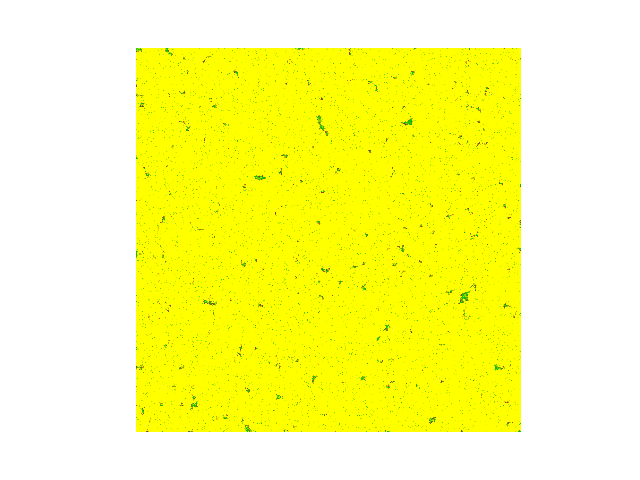

In [35]:
fig = plt.figure()
plt.axis('off')
im = plt.imshow(makeColorGrid(grids[0,:,:]), animated=True)

# The animation function: called to produce a frame for each generation.
def updatefig(i, *args):
    global grids
    im.set_array(makeColorGrid(grids[i,:,:]))
    return im,

grid_ani = animation.FuncAnimation(fig, updatefig, save_count = len(grids), 
                                   interval=100, blit=True)


# grid_ani.save('forestfire.mp4', dpi=150, fps=30, writer='ffmpeg', extra_args=['-vcodec', 'libx264'])

plt.show()

In [ ]:
grids = fire(2000, 0.8, 0.001, 0.001, 0.3, 20)

In [ ]:
fig = plt.figure()
plt.axis('off')
im = plt.imshow(makeColorGrid(grids[0,:,:]), animated=True)

# The animation function: called to produce a frame for each generation.
def updatefig(i, *args):
    global grids
    im.set_array(makeColorGrid(grids[i,:,:]))
    return im,

grid_ani = animation.FuncAnimation(fig, updatefig, save_count = len(grids), 
                                   interval=100, blit=True)
plt.show()

In [ ]:
# FFwiter = animation.FFMpegWriter    

# metadata = dict(title='fire', artist='Korede')
# writer = FFMpegWriter(fps=15, metadata=metadata, bitrate=1800)

In [ ]:
# n = 100
# X = np.zeros((n, n))
# #n, n = 100, 100
# colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
# cmap = colors.ListedColormap(colors_list)
# bounds = [0,1,2,3]
# norm = colors.BoundaryNorm(bounds, cmap.N)


# fig = plt.figure(figsize=(25/3, 6.25))
# ax = fig.add_subplot(111)
# ax.set_axis_off()
# im = ax.imshow(X, cmap=cmap, norm=norm)


# def animate(i):
#     im.set_data(animate.X)
#     animate.X = iterate(animate.X)
    
# # Bind our grid to the identifier X in the animate function's namespace.
# animate.X = X

# # Interval between frames (ms).
# anim = animation.FuncAnimation(fig, animate, interval=100, frames=200, blit=True)
# plt.show()



# def animate(i):
#      im.set_data(animate.X)
#      return im

# def visualize():
#     initial_forest_grid = initForestGrid(100)
#     anim = animation.FuncAnimation(fig, animate, save_count = len(initial_forest_grid), interval=100)
    
#     for i in range(10):
#         initial_forest_grid = spread(initial_forest_grid)
        
#         im = ax.imshow(initial_forest_grid, cmap=cmap, norm=norm) 
        
#         anim = animation.FuncAnimation(fig, animate, save_count = len(initial_forest_grid), interval=100)
#         plt.show()

In [ ]:
# fig = plt.figure()
# plt.axis('off')
# im = plt.imshow(makeColorGrid(grids[0,:,:]), animated=True)

# # The animation function: called to produce a frame for each generation.
# def animate(i, *args):
#     global grids
#     im.set_array(makeColorGrid(grids[i,:,:]))
#     return im,

# grid_ani = FuncAnimation(fig, animate, interval=20)



# # To save the animation, use the command, placed before HTML: 
# # grid_ani.save('Fire.mp4', writer=writer)
# # HTML(grid_ani.to_html5_video())
# plt.show()

# video = grid_ani.to_html5_video()
# html = display.HTML(video)
# display.display(html)
# plt.close()